## Baseline Model: Logistic Regression

### Objective

This notebook establishes a simple and interpretable baseline for the happiness
classification task. A logistic regression model is trained on flattened image
vectors to verify that the dataset contains a learnable signal.

This baseline serves as a lower bound for future models.    

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Import Data Loader

Data is loaded exclusively through the public interface defined in `src.data`.

In [2]:
PROJECT_ROOT = Path("..")
sys.path.insert(0, str(PROJECT_ROOT))

from src.data import load_train_test

## Load Dataset

Train and test splits are loaded using a consistent preprocessing pipeline. 

In [3]:
DATA_DIR = PROJECT_ROOT / "data"
X_train, y_train, X_test, y_test = load_train_test(DATA_DIR)

## Flatten Images

Logistic regression operates on vector inputs. Each image is therefore flattened
into a one-dimensional feature vector.

This intentionally discards spatial structure and is acceptable for a baseline
model.

In [4]:
n_train, h, w = X_train.shape
n_test = X_test.shape[0]

X_train_flat = X_train.reshape(n_train, h * w)
X_test_flat = X_test.reshape(n_test, h * w)

X_train_flat.shape, X_test_flat.shape

((28709, 2304), (7178, 2304))

## Train Logistic Regression Model

A standard logistic regression classifier is trained without extensive
hyperparameter tuning.

In [8]:
model = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)

model.fit(X_train_flat, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## Model Evaluation

Model performance is evaluated on the test set using accuracy and a confusion
matrix.

In [9]:
y_pred = model.predict(X_test_flat)

test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.7698523265533574

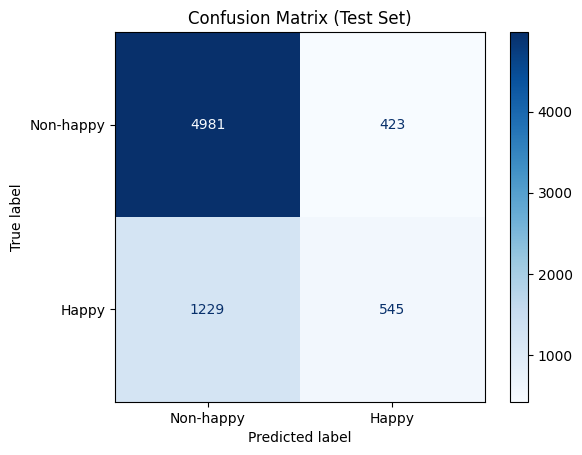

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Non-happy", "Happy"]
)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Test Set)")
plt.show()

## Interpretation

- The model achieves performance above random guessing, indicating the presence
  of a learnable signal.
- Errors are expected due to low image resolution and loss of spatial structure.
- This baseline provides a reference point for evaluating more expressive models.

The results justify the use of models that preserve spatial information.

## Stop Condition

The baseline model establishes a lower bound for performance. Further
improvements should focus on models that leverage spatial structure while
maintaining interpretability.